In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [18]:
df=datasets.load_iris()
iris_df=pd.DataFrame(df.data,columns=df.feature_names)

In [19]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
print(iris_df.shape)

(150, 4)


In [6]:
iris_df.isnull(). sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [7]:
print('total number of null values=',iris_df.isnull().sum().sum() )

total number of null values= 0


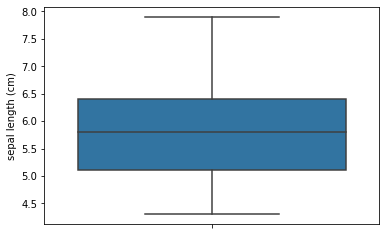

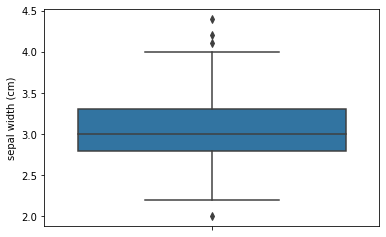

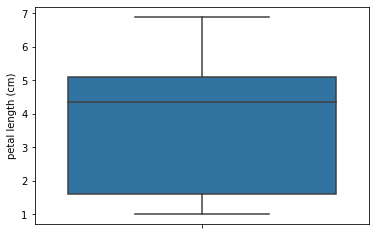

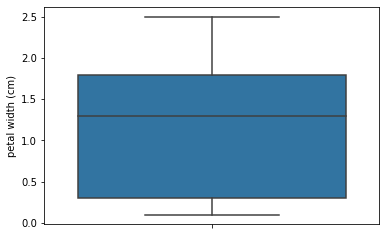

In [8]:
cols=iris_df.columns
for i in cols:
    sns.boxplot(y=iris_df[i])
    plt.show()

In [9]:
#to remove outliers
q1=iris_df["sepal width (cm)"].quantile(0.25)
q3=iris_df["sepal width (cm)"].quantile(0.75)
iqr=q3-q1
iris_df=iris_df[(iris_df["sepal width (cm)"]>= q1-1.5*iqr) & (iris_df["sepal width (cm)"] <= q3+1.5*iqr)]
iqr= q3-q1
#To find out number of rows and columns
iris_df.shape

(146, 4)

In [10]:
x=iris_df.iloc[:,[0,1,2,3]].values
from sklearn.cluster import KMeans
WCSS=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    WCSS.append(kmeans.inertia_)


In [11]:
iris_df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.123144,0.879362,0.822587
sepal width (cm),-0.123144,1.000000,-0.406141,-0.340602
petal length (cm),0.879362,-0.406141,1.000000,0.961866
petal width (cm),0.822587,-0.340602,0.961866,1.000000


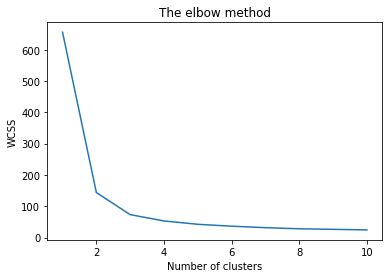

In [12]:
plt.plot (range(1,11),WCSS)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
#Applying kmeans to the dataset
kmeans= KMeans(n_clusters=3, init= 'k-means++',
              max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(x)

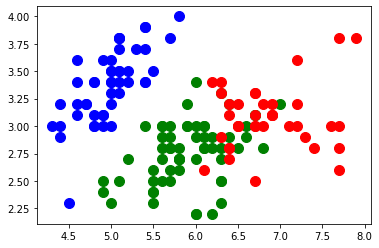

In [14]:
#Visualising the clusters
plt.scatter(x[y_kmeans==0,0], x[y_kmeans==0,1],
           s=100, c='blue', label='Iris-setosa')
plt.scatter(x[y_kmeans==1,0], x[y_kmeans==1,1],
           s=100, c="green", label='Iris-versicolour')
plt.scatter(x[y_kmeans==2,0], x[y_kmeans==2,1],
           s=100, c ='red', label='Iris-virginica')

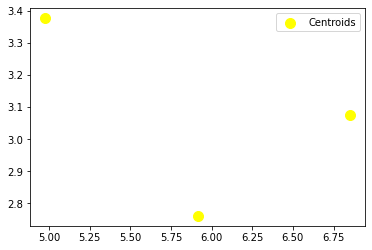

In [15]:
#Ploting the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
           s=100,c='yellow',label='Centroids')
plt.legend()

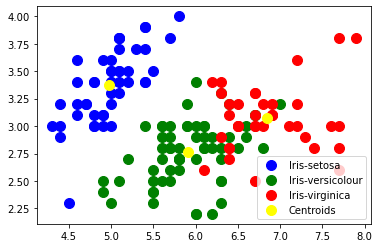

In [16]:
#Combining the graphs
plt.scatter(x[y_kmeans==0,0], x[y_kmeans==0,1],
           s=100, c='blue', label='Iris-setosa')
plt.scatter(x[y_kmeans==1,0], x[y_kmeans==1,1],
           s=100, c="green", label='Iris-versicolour')
plt.scatter(x[y_kmeans==2,0], x[y_kmeans==2,1],
           s=100, c ='red', label='Iris-virginica')
#Ploting the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
           s=100,c='yellow',label='Centroids')
plt.legend()